<a href="https://colab.research.google.com/github/mukeshyadav4747/DL/blob/main/CNN_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import tensorflow as tf

In [ ]:
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt

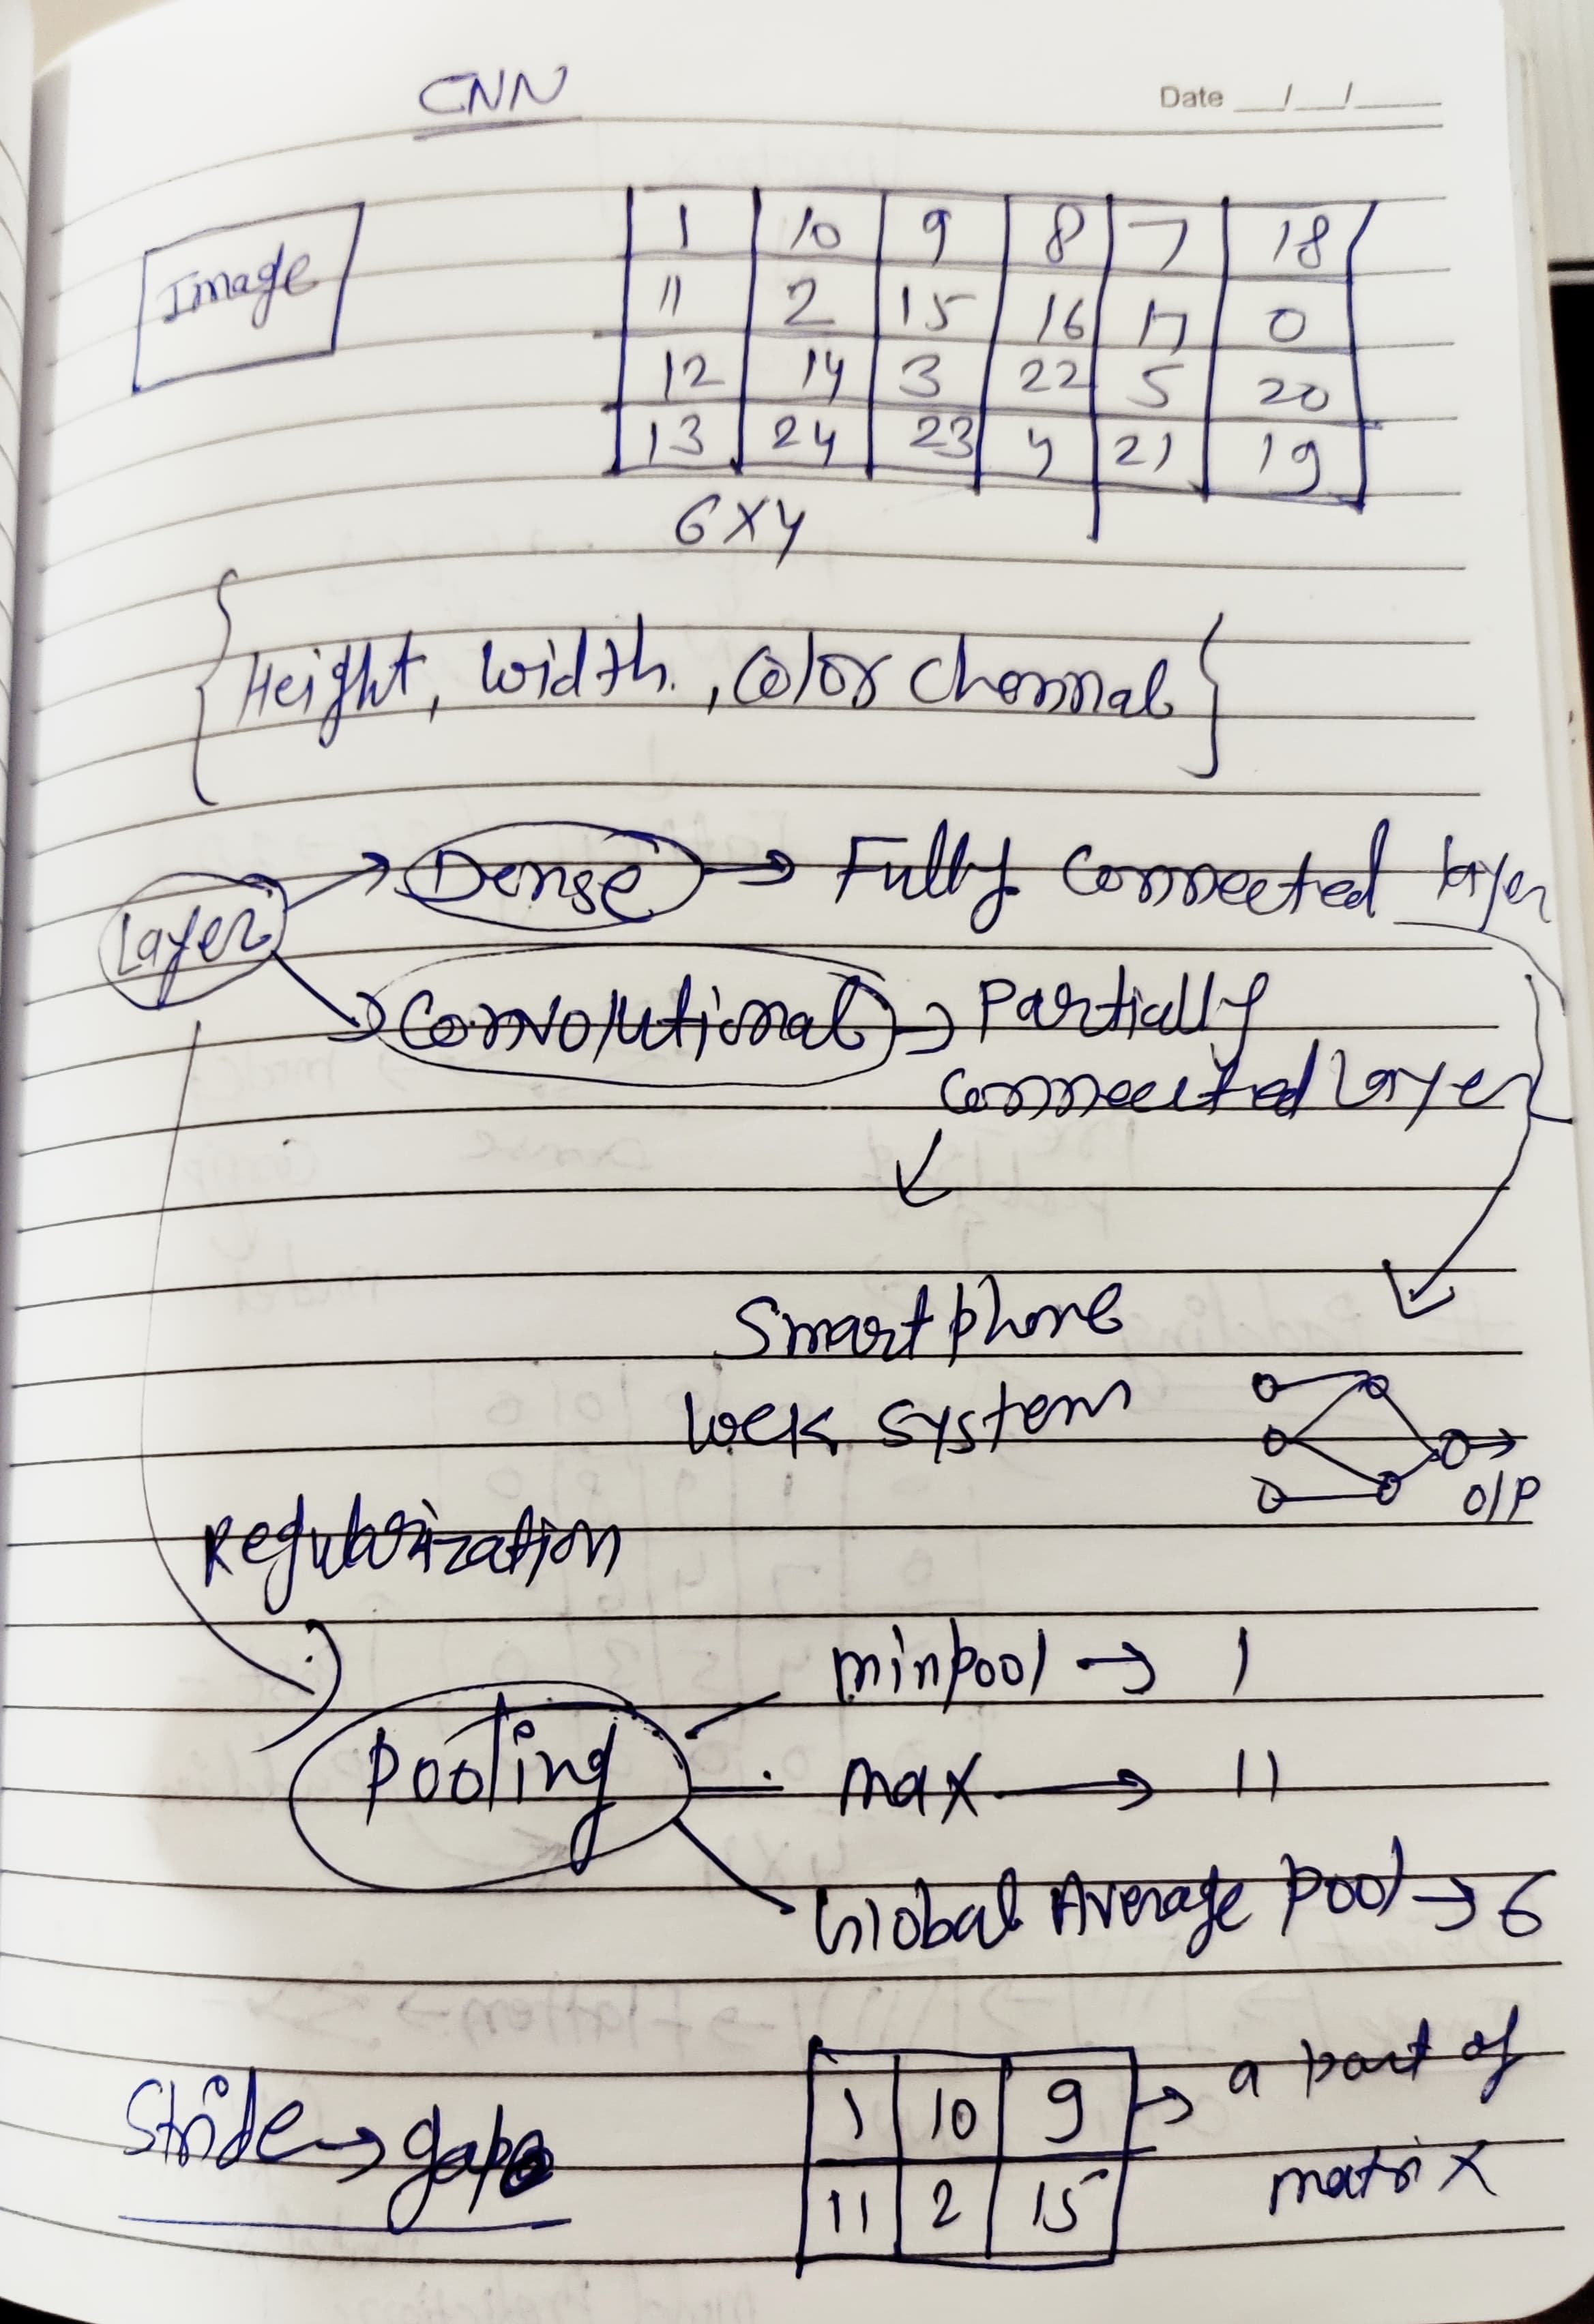

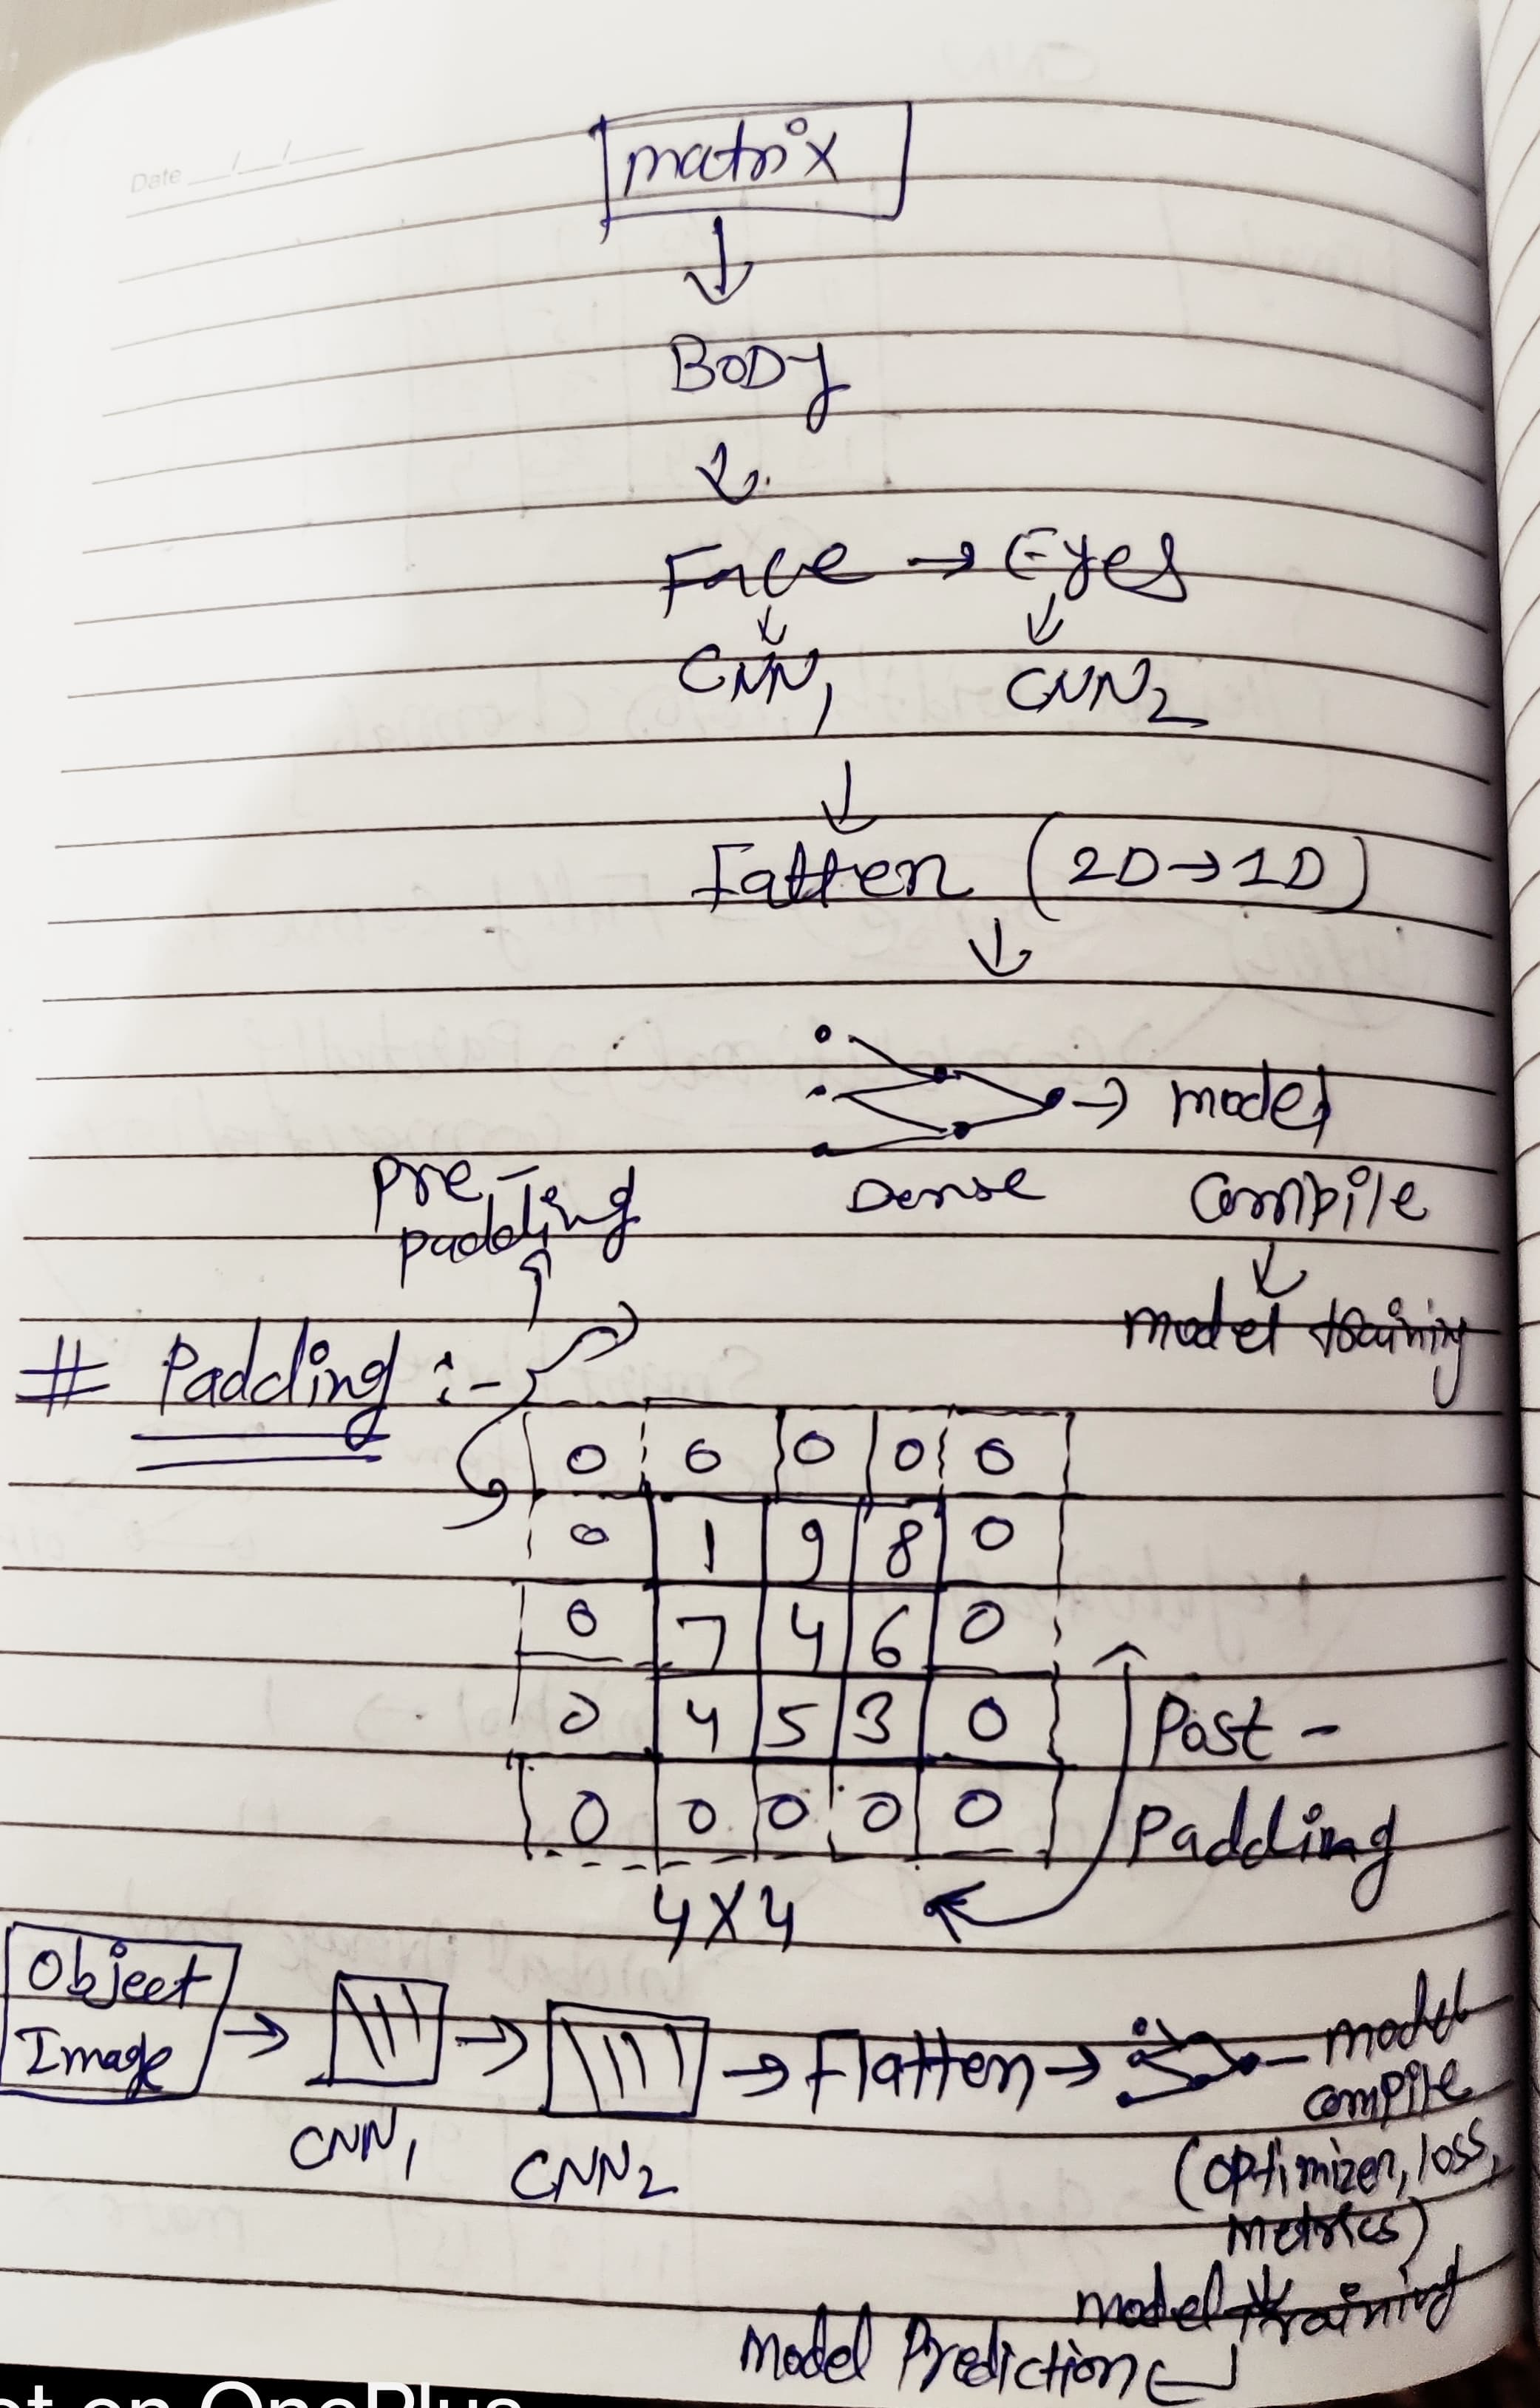

In [ ]:
# Load and split datasets

(train_images, train_labels), (test_images, test_labels)= datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1. train_images, test_images= train_images/255.0, test_images/255.0

In [ ]:
class_names = ['airplane', 'automobile', 'bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
# Let's look at a one image. we change this to look at other images(img_index=1,2,3....)

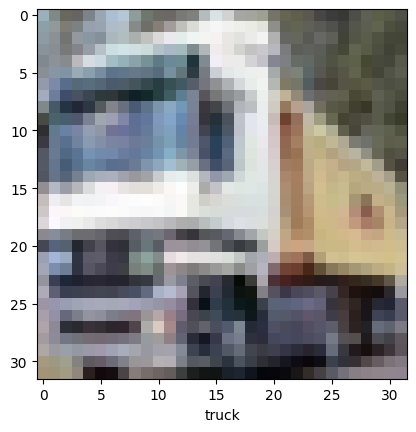

In [ ]:
IMG_INDEX=1
plt.imshow(train_images[IMG_INDEX],cmap= plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2))) # This layer will perform the max pooling operation using 2*2 samples
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary() # Let's have a look at our model so far

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(layers.Flatten()) # we need to take there etracted features and add a way to classify them.
# This is why we add the layers to our model.
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# We can see the flatten layer changes the shape of our data so that we can feed it to the 64 nodes dense layer,
# followed by the final output layer, followed by the fial output layer of 10 neurons (one for each class).


In [ ]:
# Now we will train and compile the model using recommended hyperparameters from tensorflow.
model.compile(optimizer ='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics = ['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 37ms/step - accuracy: 0.5762 - loss: 1.2031 - val_accuracy: 0.5956 - val_loss: 1.1546
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 39ms/step - accuracy: 0.6360 - loss: 1.0439 - val_accuracy: 0.6046 - val_loss: 1.1497
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.6647 - loss: 0.9571 - val_accuracy: 0.6524 - val_loss: 1.0250
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 41ms/step - accuracy: 0.6892 - loss: 0.8849 - val_accuracy: 0.6342 - val_loss: 1.0726
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 39ms/step - accuracy: 0.7202 - loss: 0.8064 - val_accuracy: 0.6667 - val_loss: 1.0034
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.7358 - loss: 0.7584 - val_accuracy: 0.6545 - val_loss: 1.0434
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.7458 - loss: 0.7306 - val_accuracy: 0.6605 - val_loss: 1.0825
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.7642 -

In [ ]:
# Train on 50000 samples and validate on 10000 samples.

In [ ]:
# Evalute the model ==> we can determine how well the model perfomed by looking as it's performance on the test data sets.

In [ ]:
test_loss , test_acc = model.evaluate(test_images, test_labels, verbose =2)
print(test_acc)


313/313 - 3s - 10ms/step - accuracy: 0.6643 - loss: 1.1054
0.6643000245094299


In [ ]:
# In this model we get our accuracy ~ 70%. this is okey but surely there is a way to improve on this by pretrained model and fine tuning.